# Exploratory Data Analysis 

## 1. Environment Setup ##

- Necessary libraries in order to conduct EDA have been installed and imported.

- Here are the main functions of the libraries which has been used:

***Pandas:*** Primary data manipulation tool.

***Geopandas:*** Understanding map coordinates and visualization.

***Matplotlib:*** Foundational plotting.

***Seaborn:*** Creating more convincing plots and maps.

***Scipy:*** Main statistics library.

***Numpy:*** Array manipulation and fast math operations.

In [31]:
import pandas as pd  
import numpy as np   
import geopandas as gpd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import scipy.stats as stats 


print("All libraries imported successfully.")

All libraries imported successfully.


## 2. Initial Cleaning and Selection ##

**For each dataset the following steps are executed:**

**1.** Reading the specific CSV file.

**2.** Selecting only necessary columns.

**3.** Filtering junk rows.

**4.** Handling missing values.

**4.** Renaming columns to a standart format. 
- Sorting state names alphabetically if necessary in order to proceed easier.

**5.** Aggregation and statistical-mathematical implementations for necessary rows and columns.

- Finally, all clean data has been merged into one DataFrame. Information has been stored with respect to state.


**Necessary Data and Data Labels In the Codes:**

- EV Registrations: 'Registration Count'
- Mean of Median AQI: 'AQI' 
- GDP(dollars): 'GDP' 
- Population Density(/mile2): 'Density' 
- Number of Charging Stations: 'CS_Count'
- Number of People with an Associate Degree: 'EA_Info' 
- Estimated Median Household Income(dollars): 'HI'
for each state.

### EV Registrations(Primary Variable): ###

In [3]:
#Reading the data and seeing general information.
EV_Data = pd.read_csv('EVRegistrations.csv')
EV_Data.info()
print(EV_Data.head())
print(EV_Data.tail())
#This datases has only the needed cloumn and does not have any missing values. But it has one junk row which is the 'Total'.
#States are already alphabetically sorted.

#'Total' dropped. District of Colombia dropped.
EV_Data= EV_Data[EV_Data['State'] != 'Total']
EV_Data= EV_Data[EV_Data['State'] != 'District of Columbia']
#Index reset.
EV_Data = EV_Data.reset_index(drop=True)

#Top five states with the least EV registrations.
print(EV_Data.sort_values(by=['Registration Count']).head(5))
#Top five states with the most EV registraions.
print(print(EV_Data.sort_values(by=['Registration Count'], ascending=False).head(5)))

#Final Data
EV_Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               52 non-null     object
 1   Registration Count  52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 964.0+ bytes
        State  Registration Count
0     Alabama               13047
1      Alaska                2697
2     Arizona               89798
3    Arkansas                7108
4  California             1256646
            State  Registration Count
47     Washington              152101
48  West Virginia                2758
49      Wisconsin               24943
50        Wyoming                1139
51          Total             3555445
            State  Registration Count
33   North Dakota                 959
49        Wyoming                1139
40   South Dakota                1675
1          Alaska                2697
47  West Virginia            

,State,Registration Count
0,Alabama,13047
1,Alaska,2697
2,Arizona,89798
3,Arkansas,7108
4,California,1256646
5,Colorado,90083
6,Connecticut,31557
7,Delaware,8435
8,Florida,254878
9,Georgia,92368


### Charging Stations(Enrichment Variable): ###

- In this data each row stands for one charging station. So, each occuring state has been counted and merged into one DataFrame with the counting information(charging station number) and state information.

In [4]:
#Reading the data and seeing general information.
data1 = pd.read_csv('Charging Stations.csv')
print(data1.info())
print(data1.head())
print(data1.tail())
"""Since the only information we need from this data is the number of rows with respect to state name, we do not have to drop any rows
or columns. There are no missing values in 'State' column."""
#Since the state names are in their abbreviations, standardizing of names.
#Counting each specific state occurence.
#Creating a clean DataFrame with the counting and state information.
standard_names = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'}
CS_Count = data1.groupby('State').size().reset_index(name='CS Count')
CS_Count['State'] = CS_Count['State'].replace(standard_names)
#PR dropped, District of Colombia Dropped
CS_Count= CS_Count[CS_Count['State'] != 'PR']
CS_Count= CS_Count[CS_Count['State'] != 'District of Columbia']
#Alphabetical Sorting.
CS_Count = CS_Count.sort_values('State')

#Index Reset
CS_Count = CS_Count.reset_index(drop = True)

#Top five states with the least charging stations.
print(CS_Count.sort_values(by=['CS Count']).head(5))
#Top five states with the most charging registraions.
print(print(CS_Count.sort_values(by=['CS Count'], ascending=False).head(5)))

#Final Data
CS_Count


C:\Users\ÇAĞRI\AppData\Local\Temp\ipykernel_5900\259809045.py:2: DtypeWarning: Columns (6,20,31,46,69,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('Charging Stations.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80238 entries, 0 to 80237
Data columns (total 75 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Fuel Type Code                           80238 non-null  object 
 1   Station Name                             80237 non-null  object 
 2   Street Address                           80205 non-null  object 
 3   Intersection Directions                  24003 non-null  object 
 4   City                                     80234 non-null  object 
 5   State                                    80238 non-null  object 
 6   ZIP                                      80238 non-null  object 
 7   Plus4                                    0 non-null      float64
 8   Station Phone                            76173 non-null  object 
 9   Status Code                              80238 non-null  object 
 10  Expected Date                            5882 

,State,CS Count
0,Alabama,593
1,Alaska,74
2,Arizona,1527
3,Arkansas,391
4,California,19389
5,Colorado,2619
6,Connecticut,1419
7,Delaware,273
8,Florida,4199
9,Georgia,2417


### Population Density(Enrichment Variable): ###

- In this data "Density (/mile2)" information is needed.

In [5]:
#Reading the data and seeing general information.
Pop_Density = pd.read_csv('Population.csv')
print(Pop_Density.info())
print(Pop_Density.head())
print(Pop_Density.tail())
#Data does not have any missing values for density information.

#Renaming 'Density (/mile2)' and 'US Staet' column.
Pop_Density.rename(columns = {'Density (/mile2)':'Density','US State': 'State'},inplace = True)
#Extracting only state and density information.
Pop_Density = Pop_Density[['State','Density']]

#Alphabetical sorting.
Pop_Density = Pop_Density.sort_values('State')
#Index resetting.
Pop_Density = Pop_Density.reset_index(drop=True)

#Top five states with the least populatiion density.
print(Pop_Density.sort_values(by=['Density']).head(5))
#Top five states with the highest cpopulation density.
print(Pop_Density.sort_values(by=['Density'], ascending=False).head(5))

#Final Data
Pop_Density



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              50 non-null     int64  
 1   US State          50 non-null     object 
 2   Population 2024   50 non-null     int64  
 3   Population 2023   50 non-null     int64  
 4   Growth Rate       50 non-null     float64
 5   % of US           50 non-null     float64
 6   Density (/mile2)  50 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.9+ KB
None
   Rank      US State  Population 2024  Population 2023  Growth Rate  % of US  \
0     1    California         38889770         38965193      -0.0019   0.1158   
1     2         Texas         30976754         30503301       0.0155   0.0922   
2     3       Florida         22975931         22610726       0.0162   0.0684   
3     4      New York         19469232         19571216      -0.0052   0.0580   
4  

,State,Density
0,Alabama,102
1,Alaska,1
2,Arizona,66
3,Arkansas,59
4,California,250
5,Colorado,57
6,Connecticut,749
7,Delaware,536
8,Florida,428
9,Georgia,194


### Educational Attainment(Enrichment Variable): ###

- In this data 'S1501_C01_001E' column is needed which holds the information for number of people with an associate degree.


In [6]:
#Reading data file and seeing general information.
EA_Data = pd.read_csv('Educational Attainment.csv')
print(EA_Data.info())
print(EA_Data.head())
print(EA_Data.tail())
#Data does not have any missing values for 'S1501_C01_001E' and 'NAME'.

#Extracting necessary columns and renaming them.
EA_Data = EA_Data[['S1501_C01_001E','NAME']]
EA_Data = EA_Data.rename(columns = {'S1501_C01_001E':'EA Info','NAME':'State'})
#Change the order of columns.
EA_Data = EA_Data.iloc[:, [1,0]]
#Delete first unnecessary row.
EA_Data = EA_Data[EA_Data['State']!='Geographic Area Name']
#Drop special states.
EA_Data = EA_Data[EA_Data['State']!='Puerto Rico']
EA_Data = EA_Data[EA_Data['State']!='District of Columbia']
#Reset indexes.
EA_Data = EA_Data.reset_index(drop=True)
#States are alphabetically sorted.

#Data Cleaning in order to have the EA_Info correctly and in numeric format.
EA_Data['EA Info'] = EA_Data['EA Info'].astype(str).str.replace('%','', regex=False).str.replace(',','', regex=False).str.strip()
EA_Data['EA Info'] = pd.to_numeric(EA_Data['EA Info'], errors='coerce')

#Top five states with the least educational attainment.
print(EA_Data.sort_values(by=['EA Info']).head(5))
#Top five states with the highest educational attainment.
print(EA_Data.sort_values(by=['EA Info'], ascending=False).head(5))

#Final Data
EA_Data



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Columns: 771 entries, GEO_ID to Unnamed: 770
dtypes: float64(1), object(770)
memory usage: 319.4+ KB
None
        GEO_ID                  NAME  \
0    Geography  Geographic Area Name   
1  0400000US01               Alabama   
2  0400000US02                Alaska   
3  0400000US04               Arizona   
4  0400000US05              Arkansas   

                                      S1501_C01_001E  \
0  Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...   
1                                             485435   
2                                              68011   
3                                             726880   
4                                             291543   

                                      S1501_C01_001M  \
0  Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...   
1                                               6891   
2                                               2504   
3                     

,State,EA Info
0,Alabama,485435
1,Alaska,68011
2,Arizona,726880
3,Arkansas,291543
4,California,3644130
5,Colorado,545685
6,Connecticut,341838
7,Delaware,91460
8,Florida,1906324
9,Georgia,1060982


### AQI (Enrichment Variable): ###

- In this data information about "Median AQI" for different cities of the state is present. In order to have an average for the analysis, the mean of "Median AQI"s has been computed for the cities of a certain state.

In [7]:
#Reading data file and seeing general information.
AQI_Data = pd.read_csv("AQI Indexes.csv")
print(AQI_Data.info())
print(AQI_Data.head())
print(AQI_Data.tail())
#No missing values for necessary columns.

# Calculate average Median AQI by state.
#Change the name of "Median AQI"
#Dropped unnecessary columns.
AQI_Data = (
    AQI_Data.groupby("State", as_index=False)["Median AQI"].mean().rename(columns={"Median AQI": "AQI"}))

#Drop special states.
AQI_Data = AQI_Data[AQI_Data['State']!='Puerto Rico']
AQI_Data = AQI_Data[AQI_Data['State']!='District Of Columbia']
AQI_Data = AQI_Data[AQI_Data['State']!='Country Of Mexico']
AQI_Data = AQI_Data[AQI_Data['State']!='Virgin Islands']

#Reset indexes
AQI_Data = AQI_Data.reset_index(drop = True)
#The states are already alphabetically sorted.

#Top five states with the least AQI score.
print(AQI_Data.sort_values(by=['AQI']).head(5))
#Top five states with the highest AQI score.
print(AQI_Data.sort_values(by=['AQI'], ascending=False).head(5))

#Final Data
AQI_Data



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                995 non-null    object
 1   County                               995 non-null    object
 2   Year                                 995 non-null    int64 
 3   Days with AQI                        995 non-null    int64 
 4   Good Days                            995 non-null    int64 
 5   Moderate Days                        995 non-null    int64 
 6   Unhealthy for Sensitive Groups Days  995 non-null    int64 
 7   Unhealthy Days                       995 non-null    int64 
 8   Very Unhealthy Days                  995 non-null    int64 
 9   Hazardous Days                       995 non-null    int64 
 10  Max AQI                              995 non-null    int64 
 11  90th Percentile AQI                  995 non-

,State,AQI
0,Alabama,41.133333
1,Alaska,21.125000
2,Arizona,44.923077
3,Arkansas,43.090909
4,California,47.769231
5,Colorado,41.066667
6,Connecticut,38.500000
7,Delaware,41.333333
8,Florida,40.973684
9,Georgia,43.758621


### GDP(Enrichment Variable): ###

- In this data "2024" information is needed. The sum for each city GDP information of a certain state has been calculated.

In [8]:
#Reading the data file and seeing some general information.
GDP_Data = pd.read_csv('GDP.csv')
GDP_Data.info()
GDP_Data.head()
GDP_Data.tail()
#No missing values '2024'.

#GDP information summed up for each state.
#Column names standardized.
#Dropping unnecessary columns.
GDP_Data = (
    GDP_Data.groupby("GeoName", as_index=False)["2024"].sum().rename(columns={"GeoName":"State","2024": "GDP"}))

#Drop special states.
GDP_Data = GDP_Data[GDP_Data['State']!='Rocky Mountain']
GDP_Data = GDP_Data[GDP_Data['State']!='District of Columbia']
GDP_Data = GDP_Data[GDP_Data['State']!='Southeast']
GDP_Data = GDP_Data[GDP_Data['State']!='New England']
GDP_Data = GDP_Data[GDP_Data['State']!='Great Lakes']
GDP_Data = GDP_Data[GDP_Data['State']!='Far West']
GDP_Data = GDP_Data[GDP_Data['State']!='Mideast']
GDP_Data = GDP_Data[GDP_Data['State']!='Plains']
GDP_Data = GDP_Data[GDP_Data['State']!='Great Lakes']
GDP_Data = GDP_Data[GDP_Data['State']!='Far West']
GDP_Data = GDP_Data[GDP_Data['State']!='Southwest']
GDP_Data = GDP_Data[GDP_Data['State']!='United States']
#Reset indexes
GDP_Data = GDP_Data.reset_index(drop=True)
#The states are already alphabetically sorted.

#Top five states with the least GDP.
print(GDP_Data.sort_values(by=['GDP']).head(5))
#Top five states with the highest GDP.
print(GDP_Data.sort_values(by=['GDP'], ascending=False).head(5))

#Final data
GDP_Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GeoFIPS                 484 non-null    object 
 1   GeoName                 480 non-null    object 
 2   Region                  480 non-null    object 
 3   TableName               480 non-null    object 
 4   LineCode                480 non-null    float64
 5   IndustryClassification  480 non-null    object 
 6   Description             480 non-null    object 
 7   Unit                    480 non-null    object 
 8   1997                    480 non-null    float64
 9   1998                    480 non-null    float64
 10  1999                    480 non-null    float64
 11  2000                    480 non-null    float64
 12  2001                    480 non-null    float64
 13  2002                    480 non-null    float64
 14  2003                    480 non-null    fl

,State,GDP
0,Alabama,9.248336e+05
1,Alaska,2.036326e+05
2,Arizona,1.620283e+06
3,Arkansas,5.375612e+05
4,California,1.165345e+07
5,Colorado,1.597894e+06
6,Connecticut,1.024419e+06
7,Delaware,3.127736e+05
8,Florida,4.927066e+06
9,Georgia,2.509625e+06


### Household Income(Enrichment Variable): ###

- In this data "S1901_C01_012E" column stores the information for estimated median household income which will be used in the analysis.


In [9]:
#Reading the data file and seeing some general information.
HI_Data = pd.read_csv('Median Income.csv')
print(HI_Data.info())
print(HI_Data.head())
print(HI_Data.tail())
#No missing necessary values.


#Extracting necessary columns and renaming them.
HI_Data = HI_Data[['S1901_C01_012E','NAME']]
HI_Data = HI_Data.rename(columns = {'S1901_C01_012E':'HI','NAME':'State'})
#Change the order of columns.
HI_Data = HI_Data.iloc[:, [1,0]]
#Delete first unnecessary row.
HI_Data = HI_Data[HI_Data['State']!='Geographic Area Name']
#Drop special states.
HI_Data = HI_Data[HI_Data['State']!='Puerto Rico']
HI_Data = HI_Data[HI_Data['State']!='District of Columbia']
#Reset indexes.
HI_Data = HI_Data.reset_index(drop=True)
#States are alphabetically sorted.

#Data Cleaning in order to have the EA_Info correctly and in numeric format.
HI_Data['HI'] = HI_Data['HI'].astype(str).str.replace('%','', regex=False).str.replace(',','', regex=False).str.strip()
HI_Data['HI'] = pd.to_numeric(HI_Data['HI'], errors='coerce')

#Top five states with the least GDP.
print(HI_Data.sort_values(by=['HI']).head(5))
#Top five states with the highest GDP.
print(HI_Data.sort_values(by=['HI'], ascending=False).head(5))

#Final data
HI_Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Columns: 131 entries, GEO_ID to Unnamed: 130
dtypes: float64(1), object(130)
memory usage: 54.4+ KB
None
        GEO_ID                  NAME               S1901_C01_001E  \
0    Geography  Geographic Area Name  Estimate!!Households!!Total   
1  0400000US01               Alabama                      2059528   
2  0400000US02                Alaska                       274045   
3  0400000US04               Arizona                      2982475   
4  0400000US05              Arkansas                      1246754   

                       S1901_C01_001M  \
0  Margin of Error!!Households!!Total   
1                               11700   
2                                3774   
3                               11520   
4                                7595   

                                   S1901_C01_002E  \
0  Estimate!!Households!!Total!!Less than $10,000   
1                                             6.4   
2   

,State,HI
0,Alabama,66659
1,Alaska,95665
2,Arizona,81486
3,Arkansas,62106
4,California,100149
5,Colorado,97113
6,Connecticut,96049
7,Delaware,87534
8,Florida,77735
9,Georgia,79991


## Final DataFrame ##

- All processed dataFrames have been merged into one single dataFrame, containing all the necessary information for the analysis.

In [10]:
#Merging operation with respect to state.
from functools import reduce
dfList = [EV_Data,HI_Data,GDP_Data,EA_Data,CS_Count,Pop_Density,AQI_Data]
commonCol = 'State'
finalDF= reduce(lambda left, right: pd.merge(left, right, on=commonCol, how='outer'), dfList)
#State column into index.
finalDF.set_index("State", inplace=True)

finalDF

,Registration Count,HI,GDP,EA Info,CS Count,Density,AQI
State,,,,,,,
Alabama,13047,66659,9.248336e+05,485435,593,102,41.133333
Alaska,2697,95665,2.036326e+05,68011,74,1,21.125000
Arizona,89798,81486,1.620283e+06,726880,1527,66,44.923077
Arkansas,7108,62106,5.375612e+05,291543,391,59,43.090909
California,1256646,100149,1.165345e+07,3644130,19389,250,47.769231
Colorado,90083,97113,1.597894e+06,545685,2619,57,41.066667
Connecticut,31557,96049,1.024419e+06,341838,1419,749,38.500000
Delaware,8435,87534,3.127736e+05,91460,273,536,41.333333
Florida,254878,77735,4.927066e+06,1906324,4199,428,40.973684


## 3. Summary Statistics ##

**For each attribute the following statistics have been computed :**

**Central Tendency:**

**1.** Mean

**2.** Median

**Dispersion:**

**1.** Standard Deviation

**2.** Variance

**3.** Range(min/max)

**Dispersion and Distribution Property:**

**1.** Skewness

**2.** Kurtosis


**Results:**

**Statistics for EV Registrations:**
- *Mean:* 70947.5800
- *Median:* 25833.0000
- *Std:* 180002.6939
- *Variance:* 32400969810.3710
- *Skewness:* 6.0939
- *Kurtosis:* 40.2864
- *Range:* 1255687.0000
- *Max:* 1256646.0000
- *Min:* 959.0000

**Statistics for: Estimated Median Household Income**
- *Mean:* 80902.9200
- *Median:* 77803.0000
- *Std:* 12382.9936
- *Variance:* 153338531.4220
- *Skewness:* 0.3464
- *Kurtosis:* -0.6887
- *Range:* 45701.0000
- *Max:* 104828.0000
- *Min:* 59127.0000

**Statistics for: GDP**
- *Mean:* 1656088.0422
- *Median:* 939207.5240
- *Std:* 2128638.5207
- *Variance:* 4531101951986.1074
- *Skewness:* 3.0177
- *Kurtosis:* 10.7085
- *Range:* 11519934.9770
- *Max:* 11653449.6670
- *Min:* 133514.6900

**Statistics for: Number of People with an Associate Degree**
- *Mean:* 624001.9800
- *Median:* 420369.0000
- *Std:* 702792.1664
- *Variance:* 493916829128.9996
- *Skewness:* 2.6910
- *Kurtosis:* 8.5414
- *Range:* 3590842.0000
- *Max:* 3644130.0000
- *Min:* 53288.0000

**Statistics for: Number of Charging Stations**
- *Mean:* 1595.8800
- *Median:* 727.5000
- *Std:* 2836.4926
- *Variance:* 8045690.2302
- *Skewness:* 5.2927
- *Kurtosis:* 32.6566
- *Range:* 19315.0000
- *Max:* 19389.0000
- *Min:* 74.0000

**Statistics for: Population Density(/mile2)**
- *Mean:* 208.6800
- *Median:* 108.0000
- *Std:* 275.9048
- *Variance:* 76123.4465
- *Skewness:* 2.3381
- *Kurtosis:* 5.4400
- *Range:* 1266.0000
- *Max:* 1267.0000
- *Min:* 1.0000

**Statistics for: Mean of Median AQI**
- *Mean:* 38.1775
- *Median:* 39.4965
- *Std:* 5.4399
- *Variance:* 29.5921
- *Skewness:* -1.1703
- *Kurtosis:* 1.5239
- *Range:* 26.6442
- *Max:* 47.7692
- *Min:* 21.1250

In [11]:
#Simple loop for displaying all statistics for each column.
for col in finalDF:
    data = finalDF[col]
    
    stats = {
        "Mean": data.mean(),
        "Median": data.median(),
        "Std": data.std(),
        "Variance": data.var(),
        "Skewness": data.skew(),
        "Kurtosis": data.kurtosis(),
        "Range": data.max() - data.min(),
        "Max": data.max(),
        "Min":data.min()
    }
    
    print("Statistics for:",col)
    for key, value in stats.items():
        print(key,": ",format(value,'.4f'),sep="")

finalDF.describe()

Statistics for: Registration Count
Mean: 70947.5800
Median: 25833.0000
Std: 180002.6939
Variance: 32400969810.3710
Skewness: 6.0939
Kurtosis: 40.2864
Range: 1255687.0000
Max: 1256646.0000
Min: 959.0000
Statistics for: HI
Mean: 80902.9200
Median: 77803.0000
Std: 12382.9936
Variance: 153338531.4220
Skewness: 0.3464
Kurtosis: -0.6887
Range: 45701.0000
Max: 104828.0000
Min: 59127.0000
Statistics for: GDP
Mean: 1656088.0422
Median: 939207.5240
Std: 2128638.5207
Variance: 4531101951986.1074
Skewness: 3.0177
Kurtosis: 10.7085
Range: 11519934.9770
Max: 11653449.6670
Min: 133514.6900
Statistics for: EA Info
Mean: 624001.9800
Median: 420369.0000
Std: 702792.1664
Variance: 493916829128.9996
Skewness: 2.6910
Kurtosis: 8.5414
Range: 3590842.0000
Max: 3644130.0000
Min: 53288.0000
Statistics for: CS Count
Mean: 1595.8800
Median: 727.5000
Std: 2836.4926
Variance: 8045690.2302
Skewness: 5.2927
Kurtosis: 32.6566
Range: 19315.0000
Max: 19389.0000
Min: 74.0000
Statistics for: Density
Mean: 208.6800
Median

,Registration Count,HI,GDP,EA Info,CS Count,Density,AQI
count,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000
mean,7.094758e+04,80902.920000,1.656088e+06,6.240020e+05,1595.880000,208.680000,38.177497
std,1.800027e+05,12382.993637,2.128639e+06,7.027922e+05,2836.492593,275.904778,5.439859
min,9.590000e+02,59127.000000,1.335147e+05,5.328800e+04,74.000000,1.000000,21.125000
25%,8.221250e+03,72359.750000,3.800519e+05,1.989762e+05,373.500000,48.000000,35.446154
50%,2.583300e+04,77803.000000,9.392075e+05,4.203690e+05,727.500000,108.000000,39.496491
75%,7.164525e+04,87429.750000,2.139502e+06,7.219260e+05,1899.500000,224.500000,41.480392
max,1.256646e+06,104828.000000,1.165345e+07,3.644130e+06,19389.000000,1267.000000,47.769231


## 4. Data Visualization ##

**The following visualization variations have been used in order to have a preliminary idea and interpretation:**

**1.** Regular Plots for each Variable

**2.** Bar Plots for each Variable

**3.** Correlation Matrix(Heatmap)

**4.** Scatter Plots with Regression Lines(Primary Variable vs. Enrichment Variable)

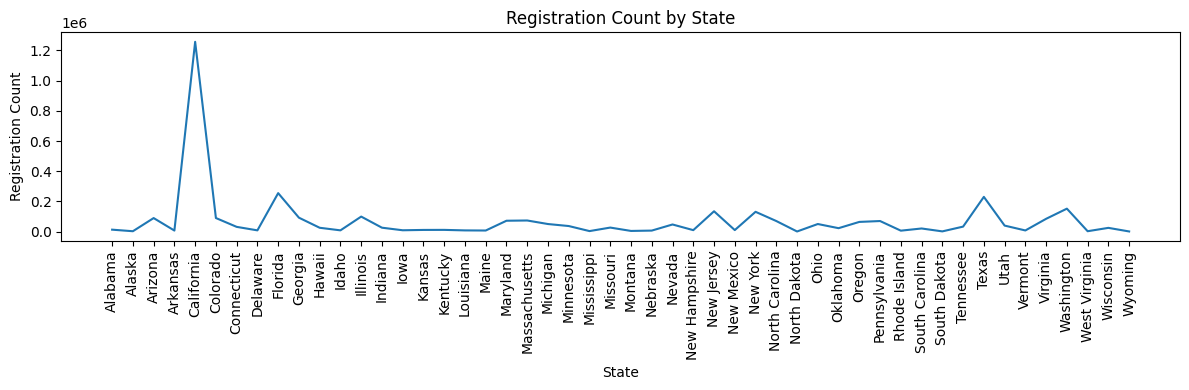

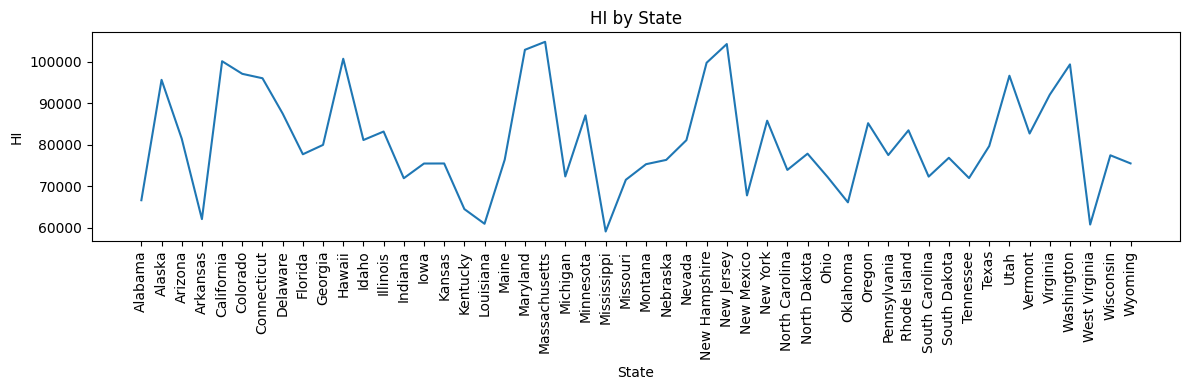

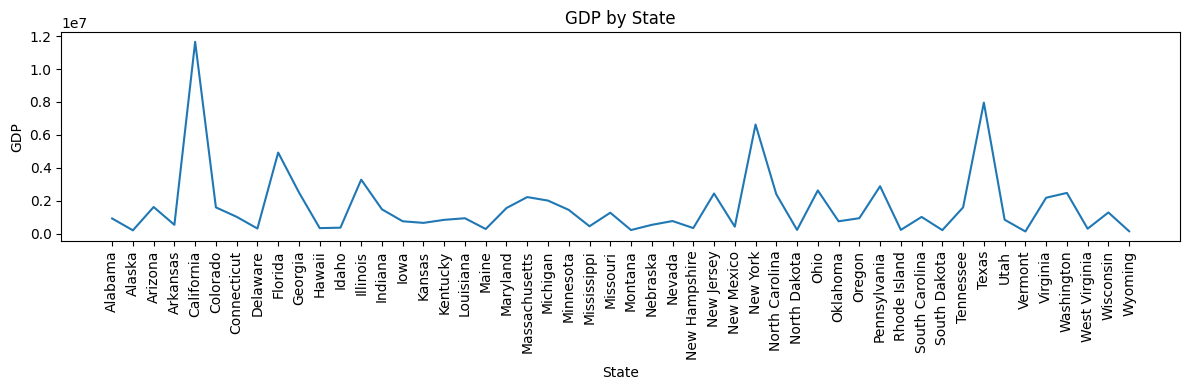

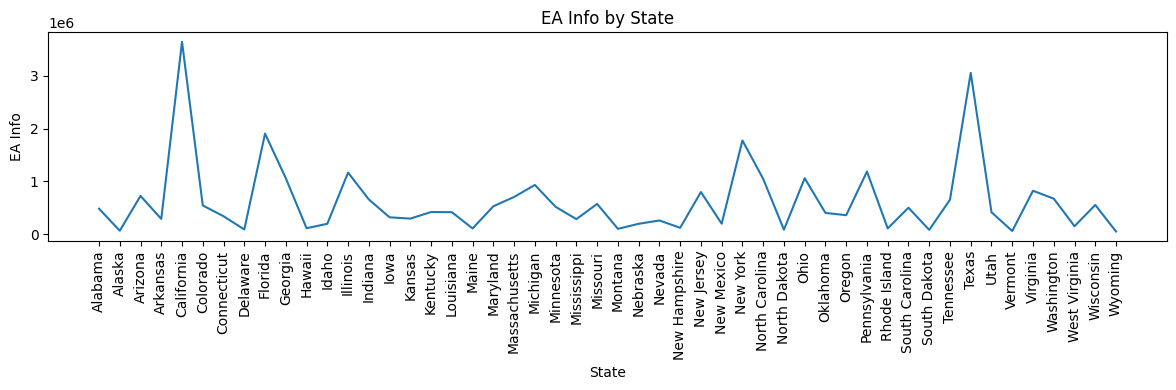

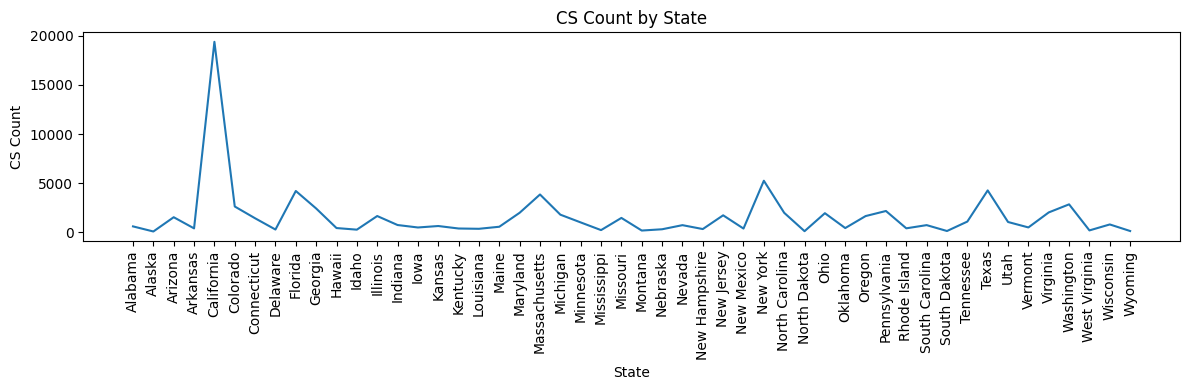

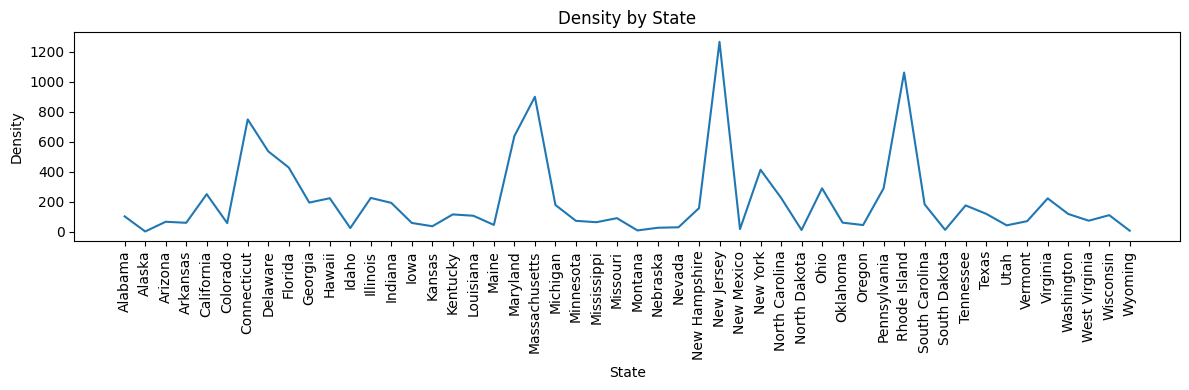

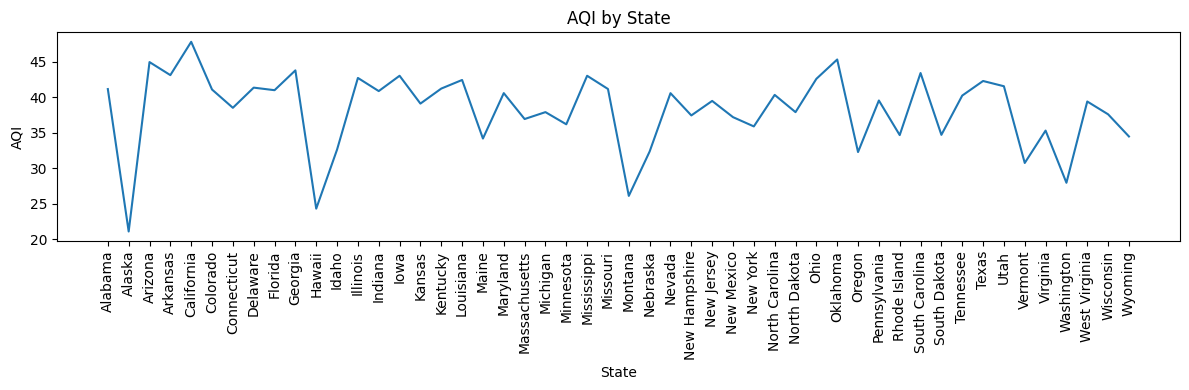

In [12]:
#Display plot for each variable
for col in finalDF:
    plt.figure(figsize=(12,4))
    plt.plot(finalDF.index, finalDF[col])
    plt.title(f"{col} by State")
    plt.ylabel(col)
    plt.xlabel("State")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

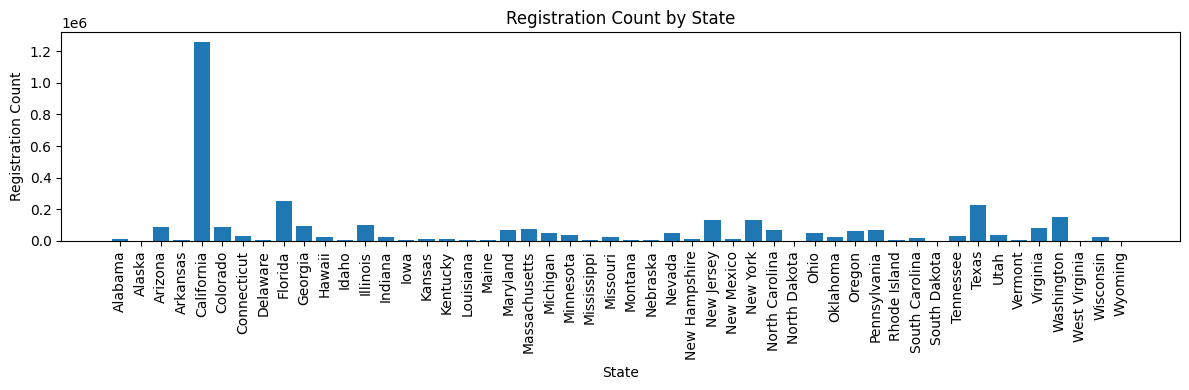

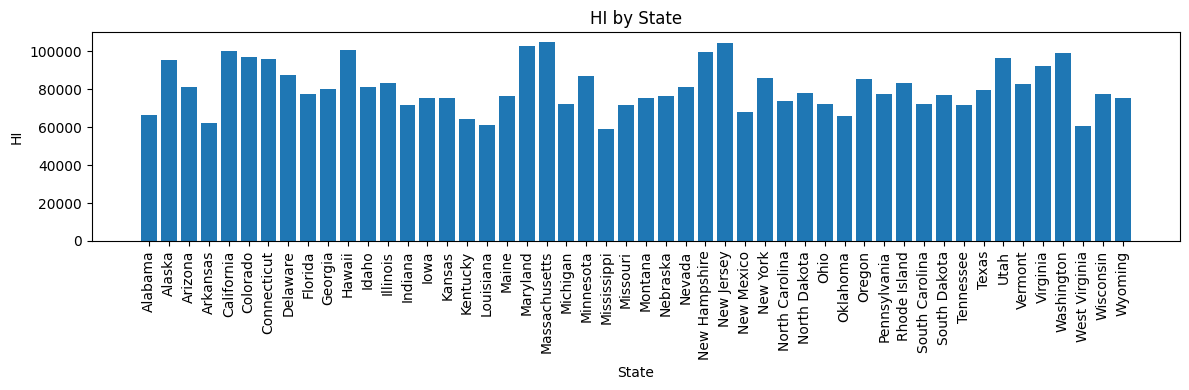

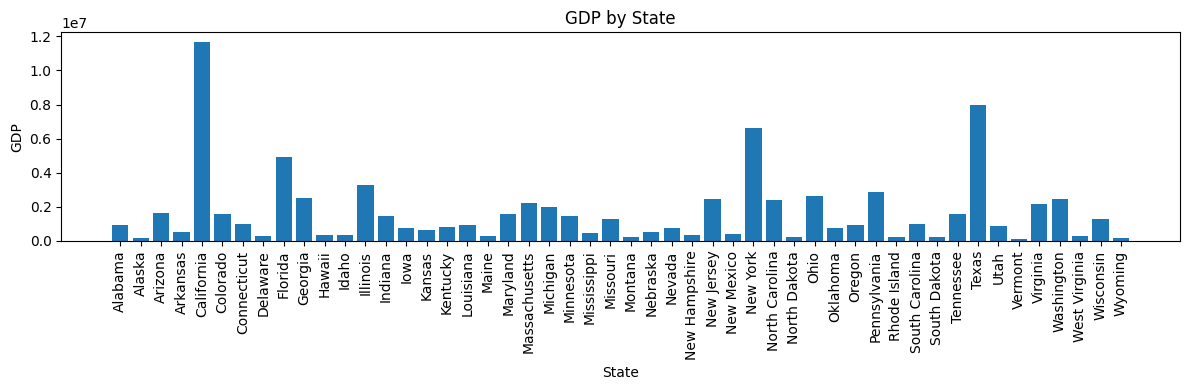

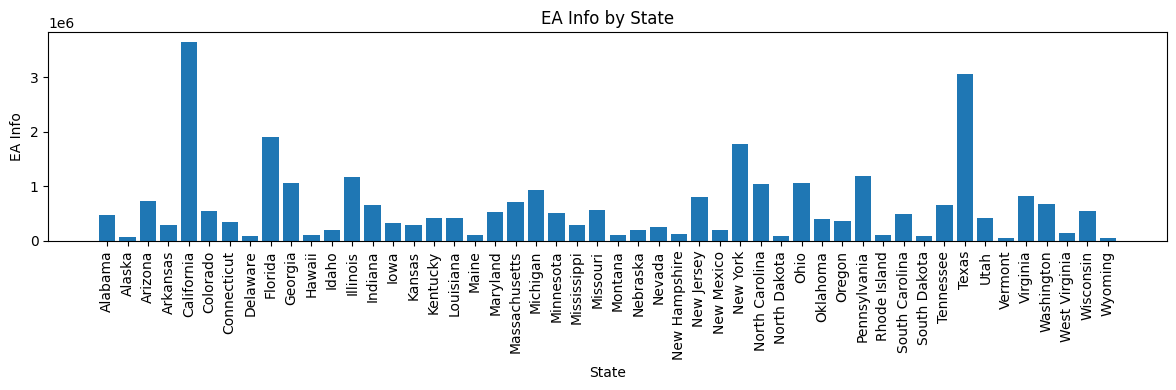

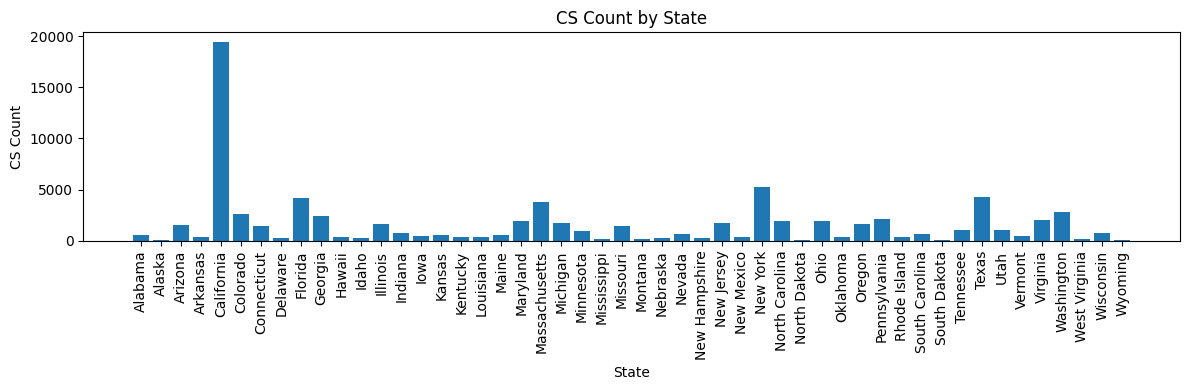

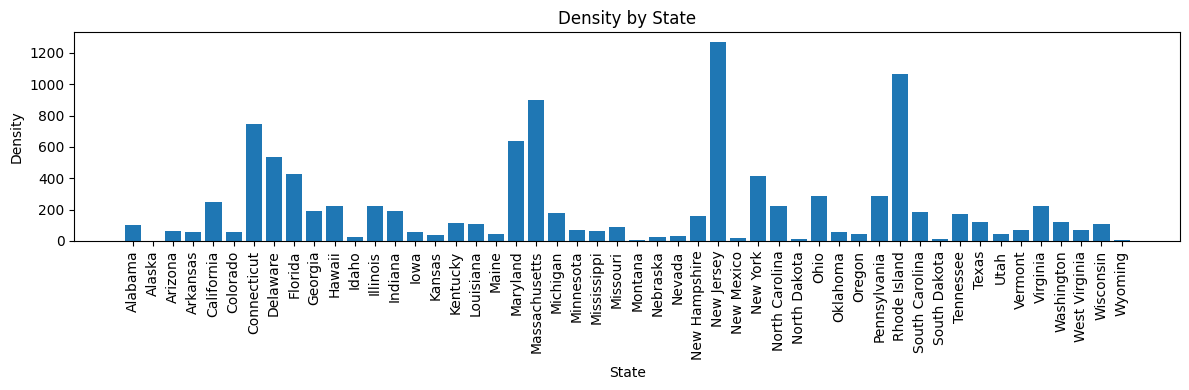

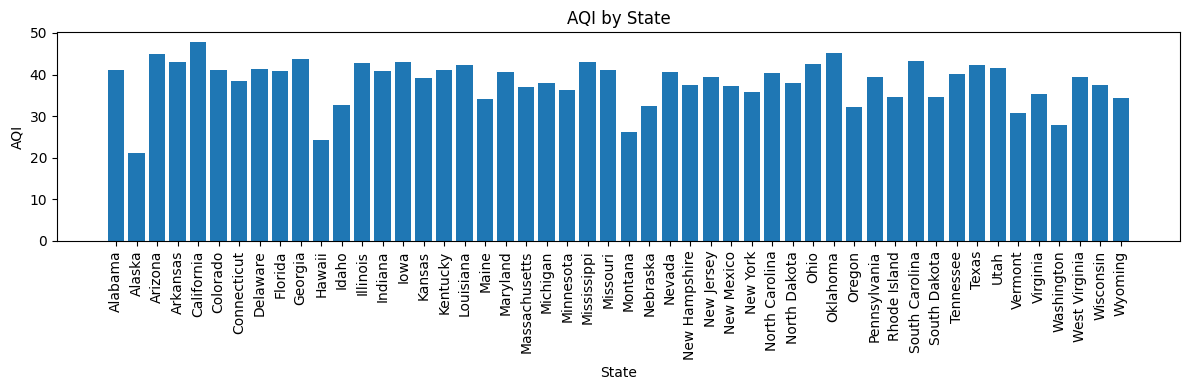

In [13]:
#Display bar plot for each variable
for col in finalDF:
    plt.figure(figsize=(12,4))
    plt.bar(finalDF.index, finalDF[col])
    plt.title(f"{col} by State")
    plt.ylabel(col)
    plt.xlabel("State")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

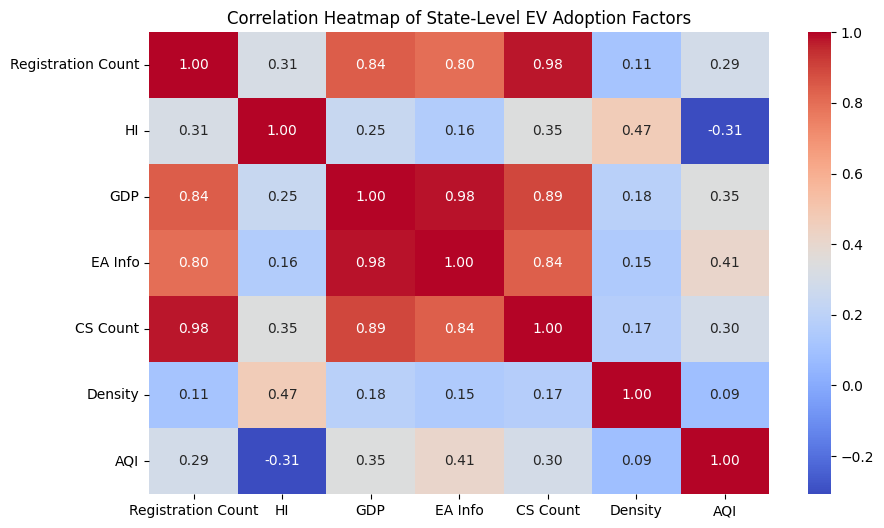

In [14]:
#Pairwise Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(finalDF.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of State-Level EV Adoption Factors")
plt.show()

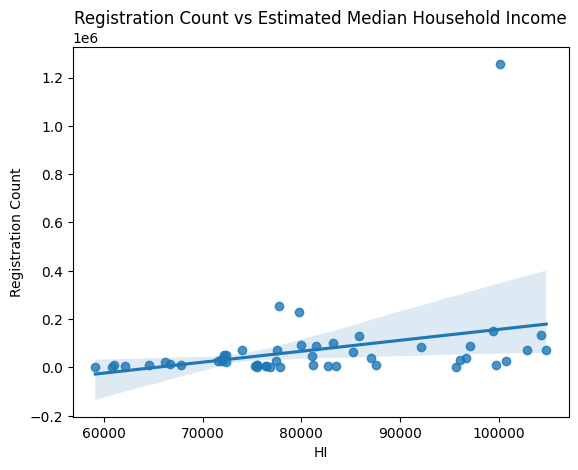

In [15]:
# Scatter Plot with Regression Lines - EV Registrations vs Estimated Median Household Income
sns.regplot(x="HI", y="Registration Count", data=finalDF)
plt.title("Registration Count vs Estimated Median Household Income")
plt.show()

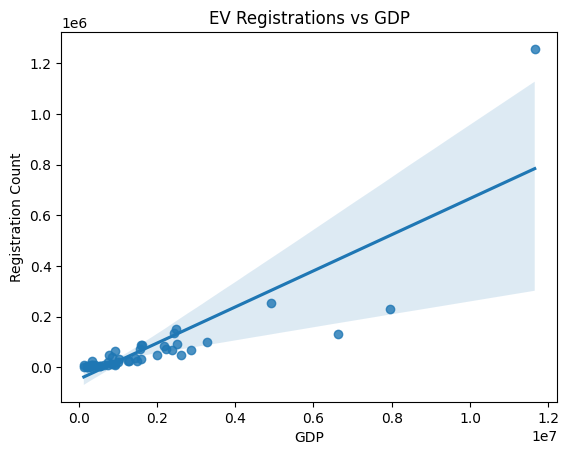

In [16]:
# Scatter Plot with Regression Lines - EV Registrations vs GDP
sns.regplot(x="GDP", y="Registration Count", data=finalDF)
plt.title("EV Registrations vs GDP")
plt.show()

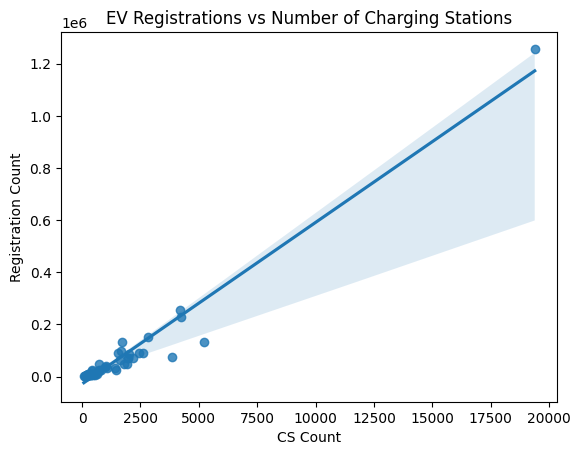

In [17]:
# Scatter Plot with Regression Lines - EV Registrations vs Number of Charging Stations
sns.regplot(x="CS Count", y="Registration Count", data=finalDF)
plt.title("EV Registrations vs Number of Charging Stations")
plt.show()

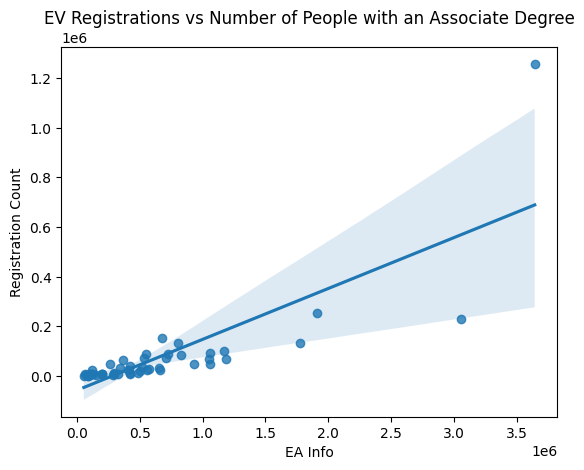

In [18]:
# Scatter Plot with Regression Lines - EV Registrations vs Number of People with an Associate Degree
sns.regplot(x="EA Info", y="Registration Count", data=finalDF)
plt.title("EV Registrations vs Number of People with an Associate Degree")
plt.show()

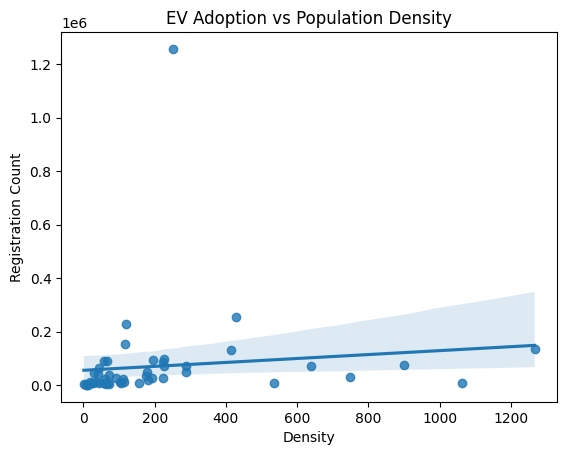

In [19]:
# Scatter Plot with Regression Lines - EV Registrations vs Population Density
sns.regplot(x="Density", y="Registration Count", data=finalDF)
plt.title("EV Adoption vs Population Density")
plt.show()

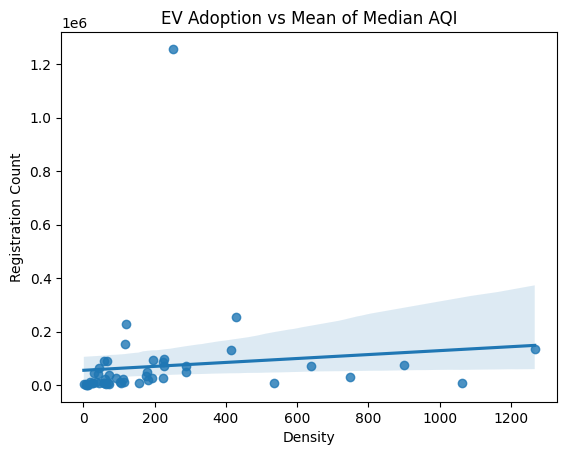

In [20]:
# Scatter Plot with Regression Lines - EV Registrations vs Mean of Median AQI
sns.regplot(x="Density", y="Registration Count", data=finalDF)
plt.title("EV Adoption vs Mean of Median AQI")
plt.show()

## 5. Correlations ##

**Spearmann Correlation** has been utilised since it is not known whether there is a linear relationship between variables, and there might be outliers. It is more feasible to focus on the monotonic relationship.

**Spearman Correlation Results with EV Registrations:**

- Number of Charging Stations: **Spearman Coefficient**= 0.9481 **p-value**= 0.0000
- GDP:  **Spearman Coefficient**= 0.9232 **p-value**= 0.0000
- Number of People with an Associate Degree:  **Spearman Coefficient**= 0.8853 **p-value**= 0.0000
- Population Density:  **Spearman Coefficient**= 0.5844 **p-value**= 0.0000
- Estimated Median Household Income:  **Spearman Coefficient**= 0.4426 **p-value**= 0.0013
- Mean of Median AQI:  **Spearman Coefficient**= 0.2979 **p-value**= 0.0356

**Correlation Plots:**

- A Spearmann Correlation Matrix has been printed.
- Various visualizations displayed.



In [21]:
from scipy.stats import spearmanr
DV = 'Registration Count'

# Sonuçları saklamak için sözlük
results = {}

#Calculating spearmann correlation coefficient for each IV
for col in finalDF.columns:
    if col != DV:
        coef, p = spearmanr(finalDF[DV], finalDF[col])
        results[col] = {'Spearman Coefficient': format(coef, '.4f'), 'p-value': format(p, '.4f')}

#Converting the results into a dataFrame.
corr_df = pd.DataFrame(results).T.sort_values('Spearman Coefficient', ascending=False)

#Printing the results.
print("Spearman Correlation Results with EV Registration Count:\n")
print(corr_df)

Spearman Correlation Results with EV Registration Count:

         Spearman Coefficient p-value
CS Count               0.9481  0.0000
GDP                    0.9232  0.0000
EA Info                0.8853  0.0000
Density                0.5844  0.0000
HI                     0.4426  0.0013
AQI                    0.2979  0.0356


In [22]:
#Seeing Spearmann Correlation Matrix
corr_spearman = finalDF.corr(method='spearman')

print("Spearman Correlation Matrix:\n")
print(corr_spearman)

Spearman Correlation Matrix:

                    Registration Count        HI       GDP   EA Info  \
Registration Count            1.000000  0.442593  0.923169  0.885330   
HI                            0.442593  1.000000  0.202689  0.095798   
GDP                           0.923169  0.202689  1.000000  0.985114   
EA Info                       0.885330  0.095798  0.985114  1.000000   
CS Count                      0.948139  0.384970  0.917503  0.888019   
Density                       0.584360  0.321112  0.624073  0.605681   
AQI                           0.297870 -0.320728  0.423732  0.467046   

                    CS Count   Density       AQI  
Registration Count  0.948139  0.584360  0.297870  
HI                  0.384970  0.321112 -0.320728  
GDP                 0.917503  0.624073  0.423732  
EA Info             0.888019  0.605681  0.467046  
CS Count            1.000000  0.618166  0.260510  
Density             0.618166  1.000000  0.242749  
AQI                 0.260510  0.2427

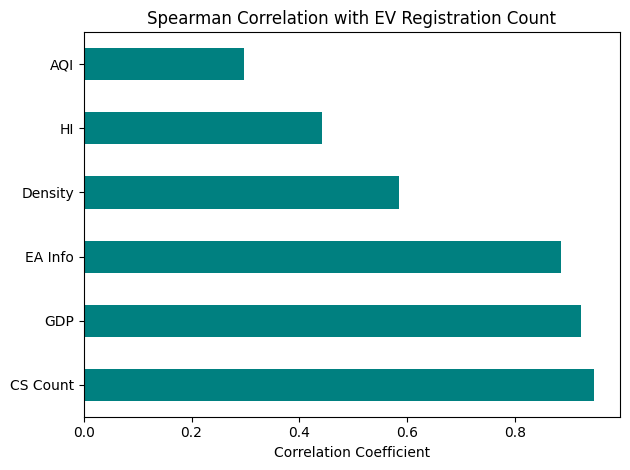

In [23]:
#Plot of correlations in order to visualize the ascending order.
target_corr = corr_spearman['Registration Count'].sort_values(ascending=False)
target_corr.drop('Registration Count').plot(kind='barh', color='teal')
plt.title("Spearman Correlation with EV Registration Count")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

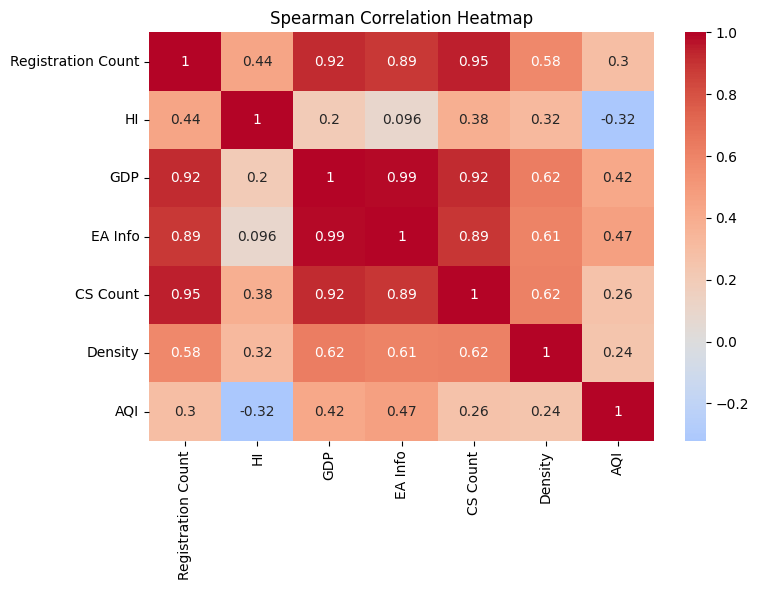

In [24]:
#Spearmann Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", center=0)
plt.title("Spearman Correlation Heatmap")
plt.tight_layout()
plt.show()

**Pimary Interpretation**

- The visual and statistical analyses indicate that states with higher GDP, better charging infrastructure, and greater educational attainment tend to have significantly higher electric vehicle (EV) registration counts. These relationships appear both strong and consistent across the plots. In contrast, factors such as population density, household income, and air quality show weaker or less stable associations with EV adoption. This suggests that while general affluence or urban concentration may play a role, economic capacity, education, and infrastructure readiness remain the most influential drivers of EV uptake across U.S. states

# Hypothesis Testing


The purpose of this section is to statistically verify the relationships observed during the Exploratory Data Analysis (EDA).  
Hypothesis testing allows us to determine whether the associations between **EV adoption (registration counts)** and the selected **economic, infrastructural, demographic, and environmental factors** are statistically significant — or if they occurred by random chance.

**Two main hypotheses were proposed in this project:**

### **Overall Relationship Hypothesis**
**H₀:** The combined economic, infrastructure, demographic, and environmental characteristics of a state do not statistically significantly correlate with its EV adoption rate (EVs per capita).(Economic, infrastructure, demographic, and environmental characteristics of a state do not significantly correlate with EV adoption.) 
**H₁:** EV adoption rates will be substantially greater in states with attributes that are generally linked to higher adoption, such as wealth, more chargers, more education, denser populations, and possibly worse air quality.(EV adoption rates are significantly related to these characteristics (e.g., wealth, charger availability, education, density, air quality).)

*Test Used:* **Spearman Rank Correlation**  
→ Measures monotonic (nonlinear) relationships between EV registrations and other variables.

---

### **Deviation from Baseline Hypothesis**
**H₀-deviation:** No other measured factors, such as population density, educational attainment, or air quality, significantly explain the remaining variation in EV adoption rates after controlling for core economic (GDP per capita) and infrastructure (chargeing station availability) factors.(Once GDP and charger availability are accounted for, no other variables significantly explain additional variation in EV adoption.)  
**H₁-deviation:** Some states do differ from observed EV adoption levels, and this is largely explained by factors other than basic wealth and charger abundance. (For example, negative residuals (lower-than-expected adoption) may be linked to lower educational attainment, whereas positive residuals (higher-than-expected adoption) may be linked to higher population density or worse air quality.)(Other variables (e.g., education, density, AQI) continue to explain differences beyond the effects of GDP and chargers.)

*Tests Used:*  
- **Mann–Whitney U Test** → compares EV registration distributions between two groups (e.g., high vs. low education).  
- **Kruskal–Wallis Test** → compares EV registrations across multiple charger availability levels.

---

### **Results Summary**
- **Spearman correlation results:** All variables significantly correlated with EV registrations (p < 0.05).  
  → **Reject H₀ (Overall Relationship)** → Accept H₁.  
- **Mann–Whitney / Kruskal–Wallis results:** Education remained significant beyond GDP and chargers; density and AQI were not.  
  → **Partial rejection of H₀-deviation** → Education still explains residual differences.

---

### **Conclusion**
Both hypotheses are statistically supported.  
The **Overall Relationship Hypothesis H₁** is fully accepted — confirming strong relationships between EV adoption and GDP, charger count, and education.  
The **Deviation from Baseline Hypothesis H₁** is partially accepted — showing education remains significant, while density and air quality effects are weaker.



## Normality Check (Shapiro-Wilk Test)

- In this test the distributions have been invastigated in order to check if they are normally distributed, which determines the test type that has to be used.

The significance level is set to *0.05*.
- If p < 0.05 → the variable is **not normally distributed**.  
- If p ≥ 0.05 → distribution is approximately **normal**.

**Test Reults:**

- Number of Charging Stations: **W**= 0.648 **p-value**= 0.0000
- GDP:  **W**= 0.952 **p-value**= 0.0000
- Number of People with an Associate Degree:  **W**= 0.702 **p-value**= 0.0042
- Population Density:  **W**= 0.451 **p-value**= 0.0000
- Estimated Median Household Income:  **W**= 0.690 **p-value**= 0.0000
- Mean of Median AQI:  **W**= 0.917 **p-value**= 0.0002

**Interpretation:**

- All variables are non-normally distributed, meaning **non-parametric tests** are more appropriate.



In [32]:
#Calculate Shapiro-Wilk Test statistics for all variables.
from scipy.stats import shapiro
for col in ['Registration Count', 'GDP', 'HI', 'EA Info', 'CS Count', 'Density', 'AQI']:
    stat, p = shapiro(finalDF[col])
    print(f"{col}: W = {stat:.3f}, p = {p:.3f}")

Registration Count: W = 0.338, p = 0.000
GDP: W = 0.648, p = 0.000
HI: W = 0.952, p = 0.042
EA Info: W = 0.702, p = 0.000
CS Count: W = 0.451, p = 0.000
Density: W = 0.690, p = 0.000
AQI: W = 0.917, p = 0.002


## Overall Relationship Hypothesis

**Hypothesis**

- **H₀:** The combined economic, infrastructure, demographic, and environmental characteristics of a state do not statistically significantly correlate with its EV adoption rate (EVs per capita).(Economic, infrastructure, demographic, and environmental characteristics of a state do not significantly correlate with EV adoption.) 
- **H₁:** EV adoption rates will be substantially greater in states with attributes that are generally linked to higher adoption, such as wealth, more chargers, more education, denser populations, and possibly worse air quality.(EV adoption rates are significantly related to these characteristics (e.g., wealth, charger availability, education, density, air quality).)

**Test Used:** Spearman Rank Correlation

## Spearman Rank Correlation Test

- Since the variables are all continuous and non-normally distributed, Spearman Rank Correlation Test has been conducted.

The significance level is set to *0.05*.

**Test Reults:**

- Number of Charging Stations: **Spearman Coefficient**= 0.9481 **p-value**= 0.0000
- GDP:  **Spearman Coefficient**= 0.9232 **p-value**= 0.0000
- Number of People with an Associate Degree:  **Spearman Coefficient**= 0.8853 **p-value**= 0.0000
- Population Density:  **Spearman Coefficient**= 0.5844 **p-value**= 0.0000
- Estimated Median Household Income:  **Spearman Coefficient**= 0.4426 **p-value**= 0.0013
- Mean of Median AQI:  **Spearman Coefficient**= 0.2979 **p-value**= 0.0356


In [ ]:
from scipy.stats import spearmanr
import pandas as pd

#Calculate Spearmann Correlation statistics between EV Registrations and other variables.
DV = 'Registration Count'
IV = ['GDP', 'HI', 'EA Info', 'CS Count', 'Density', 'AQI']

results = []

for f in IV:
    coef, p = spearmanr(finalDF[DV], finalDF[f])
    coef = format(coef, '.4f')
    p = format(p, '.4f')
    results.append({'Variable': f, 'Spearman_r': coef, 'p_value': p})

results_df = pd.DataFrame(results).sort_values('Spearman_r', ascending=False)
print(results_df)

   Variable Spearman_r p_value
3  CS Count     0.9481  0.0000
0       GDP     0.9232  0.0000
2   EA Info     0.8853  0.0000
4   Density     0.5844  0.0000
1        HI     0.4426  0.0013
5       AQI     0.2979  0.0356


### Interpretation

- All variables show statistically significant monotonic relationships with EV registrations (p < 0.05).  
Therefore, the null hypothesis (**H₀**) is rejected, and the alternative (**H₁**) is accepted.

However, the strength of the correlations varies:
- **Strongest:** GDP, Charger Count (CS Count), and Education (EA Info)  
- **Moderate:** Household Income (HI), Population Density  
- **Weakest:** Air Quality Index (AQI)

These results confirm that **economic prosperity, charging infrastructure, and educational attainment** are the primary drivers of EV adoption across U.S. states.

## Deviation from Baseline Hypothesis

**Hypothesis**
- **H₀-deviation:** No other measured factors, such as population density, educational attainment, or air quality, significantly explain the remaining variation in EV adoption rates after controlling for core economic (GDP per capita) and infrastructure (chargeing station availability) factors.(Once GDP and charger availability are accounted for, no other variables significantly explain additional variation in EV adoption.)  
- **H₁-deviation:** Some states do differ from observed EV adoption levels, and this is largely explained by factors other than basic wealth and charger abundance. (For example, negative residuals (lower-than-expected adoption) may be linked to lower educational attainment, whereas positive residuals (higher-than-expected adoption) may be linked to higher population density or worse air quality.)(Other variables (e.g., education, density, AQI) continue to explain differences beyond the effects of GDP and chargers.)

**Tests Used:**  
- **Mann–Whitney U Test** for comparing two groups (high vs low education, density, AQI).  
- **Kruskal–Wallis Test** for comparing multiple groups (low, medium, high charger availability).

## Mann–Whitney U Test

- Since the data for **Education**, **Population Density**, and **Air Quality (AQI)** are continuous but not normally distributed, the non-parametric Mann–Whitney U Test has been conducted to compare EV registration distributions between “high” and “low” groups (based on median splits).

The significance level is set to *0.05*.

**Test Results:**

- Education (EA Info): **U statistic** = 239.0, **p-value** = 0.0087  
- Population Density: **U statistic** = 295.5, **p-value** = 0.0814  
- Air Quality (AQI): **U statistic** = 322.0, **p-value** = 0.4152

In [45]:
from scipy.stats import mannwhitneyu
#Calculate Mann-Whitney U test statistics.
for var in ['EA Info', 'Density', 'AQI']:
    median_val = finalDF[var].median()
    high = finalDF[finalDF[var] >= median_val]['Registration Count']
    low = finalDF[finalDF[var] < median_val]['Registration Count']
    u_stat, p = mannwhitneyu(high, low)
    print(f"{var}: U={u_stat:.3f}, p={p:.4f}")


EA Info: U=586.000, p=0.0000
Density: U=517.000, p=0.0001
AQI: U=427.000, p=0.0270


## Kruskal–Wallis Test

- To evaluate whether EV registration levels differ significantly among states with **low**, **medium**, and **high** values for key continuous variables, the non-parametric Kruskal–Wallis test has been conducted.  
- This method is appropriate because both EV registrations and predictor variables are continuous but not normally distributed.

The significance level is set to *0.05*.

**Test Results:**

- Charging Station Availability (Low–Medium–High): **H statistic** = 22.86, **p-value** = 0.0000  
- GDP (Low–Medium–High): **H statistic** = 19.47, **p-value** = 0.0000


In [46]:
from scipy.stats import kruskal
import pandas as pd

# Create charger count groups (Low, Medium, High)
finalDF['CS_Group'] = pd.qcut(finalDF['CS Count'], q=3, labels=['Low', 'Medium', 'High'])
charger_groups = [finalDF[finalDF['CS_Group']==g]['Registration Count'] for g in ['Low', 'Medium', 'High']]

# Create GDP groups (Low, Medium, High)
finalDF['GDP_Group'] = pd.qcut(finalDF['GDP'], q=3, labels=['Low', 'Medium', 'High'])
gdp_groups = [finalDF[finalDF['GDP_Group']==g]['Registration Count'] for g in ['Low', 'Medium', 'High']]

# Perform Kruskal–Wallis tests
stat_cs, p_cs = kruskal(*charger_groups)
stat_gdp, p_gdp = kruskal(*gdp_groups)

print(f"Kruskal–Wallis Test (Charging Station Groups): H={stat_cs:.3f}, p={p_cs:.4f}")
print(f"Kruskal–Wallis Test (GDP Groups): H={stat_gdp:.3f}, p={p_gdp:.4f}")


Kruskal–Wallis Test (Charging Station Groups): H=39.111, p=0.0000
Kruskal–Wallis Test (GDP Groups): H=39.768, p=0.0000


### Interpretation

- The Kruskal–Wallis tests show that both **Charging Station Availability** and **GDP** have statistically significant effects on EV registrations across states (p < 0.05).  
  Therefore, the null hypothesis (**H₀**) is rejected for these variables, confirming that higher charger density and greater economic strength are strongly associated with increased EV adoption.

- The Mann–Whitney U tests indicate that **Education (EA Info)** also remains significant beyond these core factors, whereas **Population Density** and **Air Quality (AQI)** do not show significant effects (p > 0.05).

In summary, **economic capacity**, **infrastructure readiness**, and **education level** together emerge as the most influential predictors of EV adoption.  
demographic (density) and environmental (AQI) factors appear to play only a minor or indirect role once these primary variables are considered.

## Overall Hypothesis Testing Summary

| Hypothesis | Variables Tested | Test(s) Used | Result | Decision |
|-------------|------------------|--------------|---------|-----------|
| **Overall Relationship (H₁)** | GDP, HI, EA Info, CS Count, Density, AQI | Spearman Correlation | All p < 0.05 | Reject H₀ (Significant) |
| **Deviation from Baseline (H₂)** | EA Info, Density, AQI, CS Count | Mann–Whitney U, Kruskal–Wallis | Partial (Education, Chargers significant) | Partial Rejection of H₀-deviation |

**Final Interpretation:**
- The **Overall Relationship Hypothesis** is **fully supported**, confirming that EV registrations are significantly related to economic, infrastructural, demographic, and environmental factors.
- The **Deviation from Baseline Hypothesis** is **partially supported**: while education remains a significant secondary driver, population density and air quality do not significantly influence EV adoption once GDP and charging infrastructure are considered.

These findings strengthen the conclusion that **economic prosperity, infrastructure readiness, and educational attainment** are the core predictors of EV adoption across U.S. states.
